<a href="https://colab.research.google.com/github/bipul-ranjan/CounterCpdof-Bipul/blob/master/Data_Visualisation_Graded_Questions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Visualisation - Graded Questions


`Note` - *This stub file doesn't contain the conceptual questions asked on the platform*

### I) Marks Analysis

In the **'Marks.csv'** file, you can find the scores obtained by 200 students in 4 subjects of a standardised test. The different columns - `Score A`, `Score B`, `Score C` and `Score D` indicate the score obtained by a particular student in the respective subjects A, B, C and D.



Load the dataset to your notebook and answer the following questions

In [2]:
#Load the necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
#Load the dataset
df1 = pd.read_csv('/content/sample_data/Marks.csv')
df1.head()

,Score A,Score B,Score C,Score D
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


**Q1)** Load the dataset and plot a histogram for the `Score A` column by keeping the `number of bins to 6`. Which bin range among the following has the highest frequency?

(`Note` - *The bin ranges mentioned in the options are approximate values for the bin ranges that you'll actually get when you plot the histogram*)

    a)0-50
    b)50-100
    c)150-200
    d)200-250

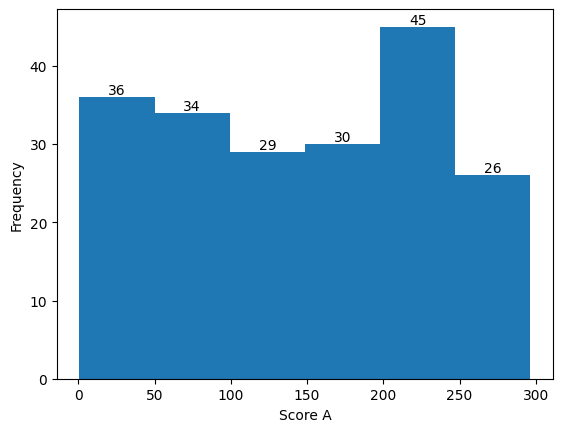

In [9]:
#Your code here
#plt.hist(df1['Score A'],bins=6)
# Calculate histogram data
hist_values, bin_edges = np.histogram(df1['Score A'], bins=6)

# Plot the histogram
plt.bar(bin_edges[:-1], hist_values, width=np.diff(bin_edges), align='edge')

# Annotate bars (replace with your desired annotation logic)
for i, val in enumerate(hist_values):
    plt.text(bin_edges[i] + 0.5 * np.diff(bin_edges)[i], val, str(val), ha='center', va='bottom')

plt.xlabel('Score A')
plt.ylabel('Frequency')
plt.show()

**Q2)** Plot a box plot for the column `Score C` and choose the correct option.

    A - The 25th percentile lies between 20 and 40
    B - The 75th percentile lies between 40 and 60
    C - The 25th percentile lies between 0 and 20
    D - Both B and C

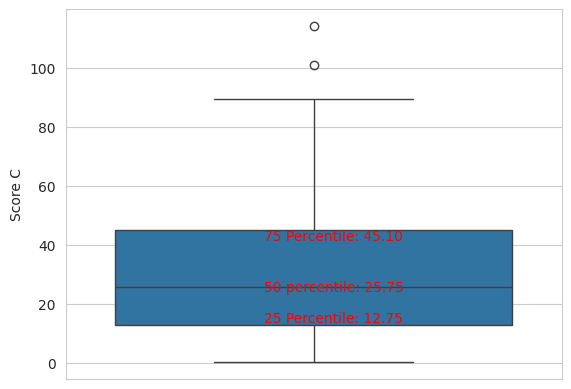

In [45]:
#Your code here
des_data=df1['Score C'].describe()

# Create a box plot
sns.set_style("whitegrid")
ax=sns.boxplot(df1['Score C'])

# Annotate the median line
per_50= des_data['50%']
per_25=des_data['25%']
per_75=des_data['75%']
ax.text(-0.1, per_50, f'50 percentile: {per_50:.2f}', verticalalignment='center',color='r')
ax.text(-0.1, per_25, f'25 Percentile: {per_25:.2f}', verticalalignment='bottom',color='r')
ax.text(-0.1, per_75, f'75 Percentile: {per_75:.2f}', verticalalignment='top',color='r')



plt.show()

### II) Superstore Data

In the `superstore.csv` file, you have the details of orders purchased in an American online retail store. Load the dataset, observe and analyse the different columns and answer the following questions.

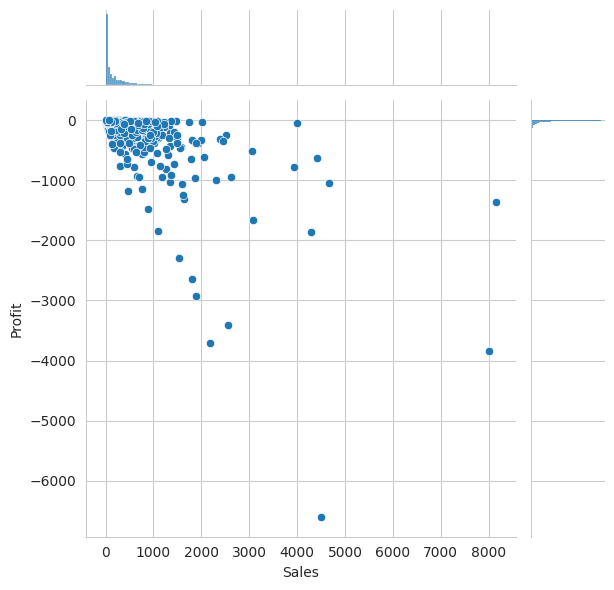

In [61]:
#Load the dataset
df2 = pd.read_csv('/content/sample_data/superstore.csv')
#df2.head()
df3 = df2[(df2.Profit < 0) & (df2.Sales < 15000)]
#sns.jointplot('Sales', 'Profit', df3)
sns.jointplot(x='Sales', y='Profit', data=df3) # Pass column names as keywords and the DataFrame as 'data'
plt.show()

<Axes: xlabel='Segment', ylabel='Sales'>

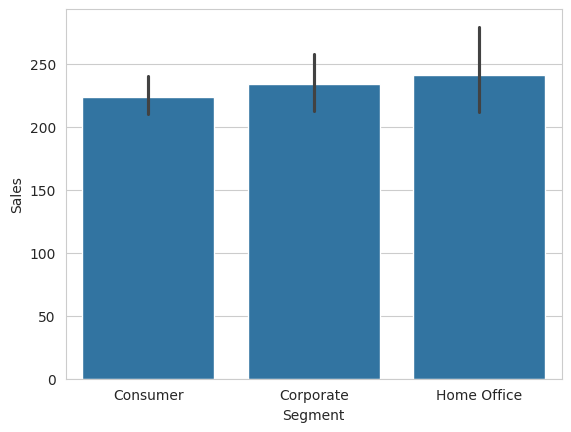

In [64]:
sns.barplot(data = df2, x = 'Segment', y = 'Sales', estimator = np.mean)

**Q4)** Plot a pie-chart to find the Ship Mode through which most of the orders are being delivered.

     a)Standard Class
     b)First Class
     c)Second Class
     d)Same Day
     

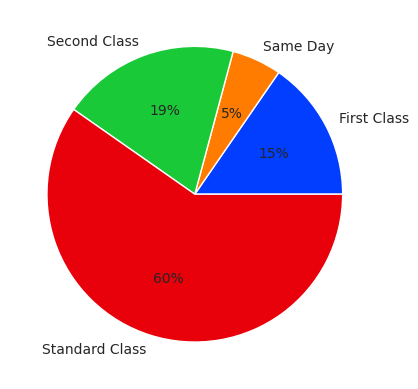

In [58]:
#Your code here
palette_color = sns.color_palette('bright')
df_ship=pd.pivot_table(df2,index=['Ship Mode'],aggfunc='size')
df_ship.head()
plt.pie(df_ship, labels=df_ship.index, colors=palette_color, autopct='%.0f%%')
plt.show()

**Q5)** Plot a bar chart comparing the average `Discount` across all the `Regions` and report back the `Region` getting the highest average discount

**Note** - You need to clean the `Discount` column first

    a)Central
    b)South
    c)West
    d)East

<class 'pandas.core.series.Series'>
RangeIndex: 9994 entries, 0 to 9993
Series name: Discount
Non-Null Count  Dtype  
--------------  -----  
9994 non-null   float64
dtypes: float64(1)
memory usage: 78.2 KB


<BarContainer object of 9994 artists>

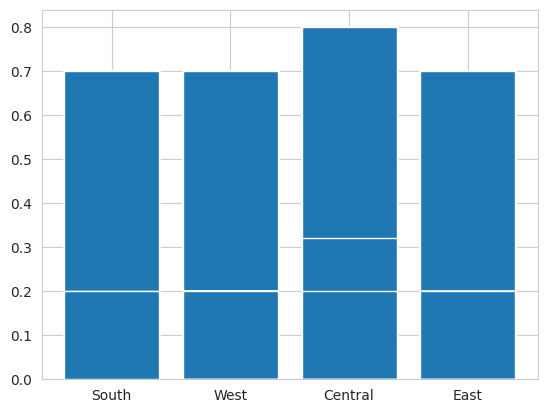

In [72]:
#Your code here
df2['Discount'].info()
#df2['Discount'] = df2['Discount'].str.replace('%', '').astype(float)
#df2.head()

plt.bar(df2['Region'], df2['Discount'])